# Plot Training Loss Curves for CLIP w/ QKV Attention

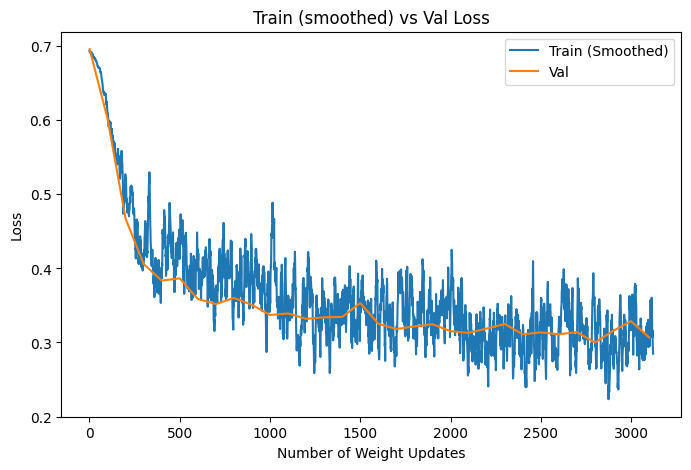

In [1]:
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

with open("../../../metrics/CLIP_QKV_metrics.pkl", "rb") as f:
    data = pickle.load(f)

train_losses = np.array(data['train_losses'])
val_losses = np.array(data['val_losses'])

# Smooth only train
train_series  = pd.Series(train_losses)
train_smooth  = train_series.rolling(window=10, min_periods=1).mean()

# Val Steps 
val_every = 100
val_steps = [1] + [i * val_every for i in range(1, len(val_losses))]

plt.figure(figsize=(8,5))
plt.plot(train_smooth, label="Train (Smoothed)")
plt.plot(val_steps, val_losses, label="Val")
plt.xlabel("Number of Weight Updates")
plt.ylabel("Loss")
plt.legend()
plt.title("Train (smoothed) vs Val Loss")
plt.show()
